In [55]:
import numpy as np
np.random.choice([0,-1,-2])

-2

In [56]:
# Ennvironment setup
# Variables
#   sizeX, sizeY : size of the gridworld
# 
# Functions
#   stateNum : input(x,y)= coordinate, output= state number
#   stateNumToCoord : input(st)= state number, output[x,y]= coordinate
#   keepInside : input(x,y)= coordinate, output[x,y]= coordinate
#   moveAgent : input(x,y,a)= coordinate, action, output[x,y]=coordinate
#   wind : input(x,y)=coordinate, output[x,y]=coordinate

sizeX = 6
sizeY = 5
nstate = sizeX*sizeY
naction =4
def stateNum(x, y):
    return(int(x + (y-1) *sizeX -1))

dicAction = {'up':1, 'left':2, 'down':3, 'right':4}

def stateNumToCoord(st):
    return([st % sizeX +1, 1+st // sizeX])  # //, %  division and the remainder

def keepInside(x, y):    
    if (x<1): 
        x=1
    elif (x>sizeX):
        x=sizeX
        
    if (y<1):
        y=1
    elif (y>sizeY):
        y=sizeY
        
    return([x,y])

goalState = stateNum(4,3)



def moveAgent(x, y, a):
   # if (stateNum(x, y) == goalState):
   #     return([x,y])
    if a in dicAction:
        a = dicAction[a]
    
    if (a == 1):
        y = y - 1
    if (a == 2):
        x = x - 1
    if (a == 3):
        y = y + 1
    if (a == 4):
        x = x + 1
    
    return(keepInside(x,y))

def wind(x,y):    
    if (x in [2,5]):
        
        y=y-np.random.choice([0,1,2])
    if (x in [3,4]):
        y=y-np.random.choice([1,2,3])
    return(keepInside(x,y))

def prMoveAgent(prIstate, a):
   # if (stateNum(x, y) == goalState):
   #     return([x,y])
    cumPr = np.zeros(nstate)
    cumPr[goalState] = prIstate[goalState]
    for istate in range(nstate):
        if (istate != goalState and prIstate[istate] > 0):
            x, y = stateNumToCoord(istate)
            pr = np.zeros(nstate)
               
            if a in dicAction:
                a = dicAction[a]
    
            if (a == 1):
                y = y - 1
            if (a == 2):
                x = x - 1
            if (a == 3):
                y = y + 1
            if (a == 4):
                x = x + 1
            x, y = keepInside(x,y)
            pr[stateNum(x,y)]=1
            cumPr = cumPr + prIstate[istate]*pr
            
    return(cumPr)
    

def prWind(prIstate):
    cumPr = np.zeros(nstate)    
    cumPr[goalState] = prIstate[goalState]
    for istate in range(nstate):
        if (istate != goalState and prIstate[istate] > 0):
            x, y = stateNumToCoord(istate)                
            pr = np.zeros(nstate)   
            if (x in [2,5]):
                x = np.ones(3)*x
                y = np.array([y, y-1, y-2])     
            elif (x in [3,4]):
                x = np.ones(3)*x
                y = np.array([y-1, y-2, y-3])     
            else:
                x = np.array([x])
                y = np.array([y])
            prob = 1/x.shape[0]            
            for i in range(x.shape[0]):                
                xTemp, yTemp = keepInside(x[i], y[i])
                pr[stateNum(xTemp, yTemp)]=pr[stateNum(xTemp, yTemp)]+prob
            
            cumPr = cumPr + prIstate[istate]*pr   
    
    
    
    return(cumPr)

In [57]:
for i in range(5):
    if i==1:
        break
    print(i)

0


In [58]:
x = np.zeros(nstate)
x.shape[0]

30

In [59]:
prWind([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
prMoveAgent([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 4)

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [60]:
prIstate = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

cumPr = np.zeros(nstate)
istate =4
if (prIstate[istate] > 0):
    x, y = stateNumToCoord(istate)                
    pr = np.zeros(nstate)   
    if (x in [2,5]):
        x = np.ones(3)*x
        y = np.array([y, y-1, y-2])     
    elif (x in [3,4]):
        x = np.ones(3)*x
        y = np.array([y-1, y-2, y-3])  
    else:
        x = np.array([x])
        y = np.array([y])
    prob = 1/x.shape[0]
    for i in range(x.shape[0]):                
        xTemp, yTemp = keepInside(x[i], y[i])
        pr[stateNum(xTemp, yTemp)]=pr[stateNum(xTemp,yTemp)]+prob
     
    cumPr = cumPr + prIstate[istate]*pr  

In [61]:
cumPr

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

cumPr

In [62]:
np.shape([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
nstate


30

In [63]:
# Test
print(stateNum(1,1))
print(moveAgent(3,1,'left'))
print(wind(3,4))

0
[2, 1]
[3, 1]


In [64]:
# goal state
print(stateNumToCoord(goalState))
print(goalState)
sNext[27,:]
stateNumToCoord(27)

[4, 3]
15


[4, 5]

In [65]:
# calculating P(s' | s, a) -> Tr[s,a,s']
nstate = sizeX*sizeY
naction = 4
Tr = np.zeros((nstate, naction, nstate), dtype=np.float) # float!

for istate in range(nstate):
    for iaction in [1,2,3,4]:     
        pr = np.zeros(nstate)
        pr[istate] = 1
        pr = prWind(pr)
        pr = prMoveAgent(pr, iaction)  
        Tr[istate,iaction-1,:] = pr

In [66]:
print(Tr[stateNum(3,3),1,:])

pr = np.zeros(nstate)
pr[14]=1
prWind(pr)
print(prMoveAgent(prWind(pr), 2))
        
print(Tr[14, 1,:])   
stateNum(3,3)

[ 0.          0.66666667  0.          0.          0.          0.          0.
  0.33333333  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
[ 0.          0.66666667  0.          0.          0.          0.          0.
  0.33333333  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
[ 0.          0.66666667  0.          0.          0.          0.          0.
  0.33333333  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        

14

In [67]:
# arrR[s, a, s'] = R(s,a,s')
arrR = np.zeros((nstate, naction, nstate), dtype=np.float)
arrR[:,:,:] = -1
arrR[goalState, :, :] = 0

In [68]:
# ER [s,a'] = Expected rewards of R(s,a,s') over s'
ER = np.zeros((nstate, naction), dtype=np.float)
for istate in range(nstate):
    for iaction in [1,2,3,4]:
        ER[istate, iaction-1] = sum(arrR[istate, iaction-1, :] * Tr[istate, iaction-1, :])

In [69]:
# pi : policy
# pi0 : random policy with pi(a|s)=1/4
pi0 = np.zeros((nstate, naction), dtype=np.float)
pi0[:, :] = 1/4

In [70]:
# matT[(s,a), (s',a')] = P((s',a')|(s,a)) given policy pi0
matT = np.zeros((nstate*naction, nstate*naction), dtype=np.float)
for istate in range(nstate):
    for iaction in range(naction):
        for jstate in range(nstate):
            for jaction in range(naction):
                matT[istate*naction +iaction, jstate*naction+jaction] = Tr[istate, iaction, jstate] * pi0[jstate, jaction]

In [71]:
# test : given (1,1), 1:'up', what's the probablity of (1,1),2:'left'
matT[stateNum(1,1)*naction + 0, stateNum(1,1)*naction + 1]

0.25

In [72]:
I= np.diag(np.ones(nstate*naction))  # identity matrix I

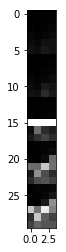

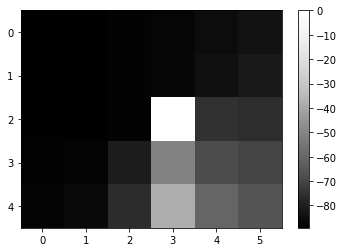

In [73]:
gamma=0.99
inv=np.linalg.inv(I- gamma* matT)   # can't solve the equation with gamma=1
vER = np.ndarray.flatten(ER)
vQ = np.dot(inv, vER)

import matplotlib.pyplot as plt
import matplotlib.cm as cm

matQ =  np.reshape(vQ , (nstate, naction))
V = np.zeros(nstate)
for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi0[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.colorbar()
plt.show()

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.  ]


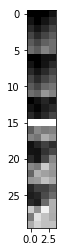

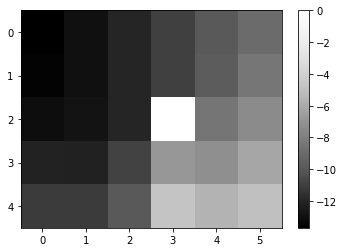

In [74]:
# vectorized Expected reward(s,a) 
vER = np.ndarray.flatten(ER)
vER = vER.reshape((nstate*naction,1))

# vectorized Q(s,a)
matQ = np.zeros((nstate,naction)) # you can set matQ as random numbers

vQ = np.zeros((nstate*naction,1))
#print(vQ.shape)
for _ in range(100):
    for istate in range(nstate):
        for iaction in range(naction):
            tempQ = 0
            for jstate in range(nstate):                
                tempQ = tempQ + Tr[istate, iaction, jstate]*max(matQ[jstate,:])
            matQ[istate,iaction] = ER[istate,iaction] + tempQ
            
    

#print(vQ)
print(matT[stateNum(4,3),:])

for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi0[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.colorbar()
plt.show()

In [75]:
# vectorized Expected reward(s,a) 
vER = np.ndarray.flatten(ER)
vER = vER.reshape((nstate*naction,1))

# vectorized Q(s,a)
vQ = np.zeros((nstate*naction,1))
#print(vQ.shape)
for _ in range(100000):
    vQ = vER + np.dot(matT, vQ)

#print(vQ)
print(matT[stateNum(4,3),:])



[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.  ]


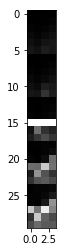

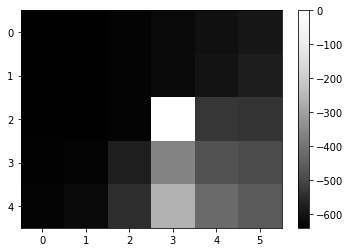

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

matQ =  np.reshape(vQ , (nstate, naction))
V = np.zeros(nstate)
for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi0[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.colorbar()
plt.show()

In [77]:
print(vQ)

[[-642.10754835]
 [-642.10754835]
 [-641.36081911]
 [-638.85427759]
 [-638.85427759]
 [-642.10754835]
 [-638.71691393]
 [-631.73837049]
 [-631.73837049]
 [-638.85427759]
 [-631.73837049]
 [-620.62246339]
 [-620.62246339]
 [-631.73837049]
 [-620.62246339]
 [-605.5065563 ]
 [-605.5065563 ]
 [-620.62246339]
 [-598.58778337]
 [-593.30942213]
 [-593.30942213]
 [-605.5065563 ]
 [-577.11228796]
 [-593.30942213]
 [-642.10754835]
 [-641.36081911]
 [-639.25799506]
 [-638.71691393]
 [-638.85427759]
 [-641.85863861]
 [-638.41636903]
 [-631.73837049]
 [-631.73837049]
 [-638.85427759]
 [-631.73837049]
 [-620.62246339]
 [-620.62246339]
 [-631.73837049]
 [-620.62246339]
 [-605.5065563 ]
 [-605.5065563 ]
 [-620.62246339]
 [-576.31173637]
 [-587.9103774 ]
 [-593.30942213]
 [-598.58778337]
 [-535.43965837]
 [-577.11228796]
 [-641.36081911]
 [-639.25799506]
 [-634.59788683]
 [-637.81527923]
 [-638.80848971]
 [-640.90878751]
 [-635.80963174]
 [-631.73420796]
 [-631.73837049]
 [-638.80848971]
 [-631.7342079

In [78]:
matQ = np.reshape(vQ , (nstate, naction))



In [79]:
pi1 = np.zeros((nstate, naction), dtype=np.float)

matQ = np.reshape(vQ , (nstate, naction))


for istate in range(nstate):
    nQ = sum(matQ[istate,:]==max(matQ[istate,:]))
    pi1[istate,matQ[istate,:]==max(matQ[istate,:])] = 1/nQ
    
matT = np.zeros((nstate*naction, nstate*naction), dtype=np.float)
for istate in range(nstate):
    for iaction in range(naction):
        for jstate in range(nstate):
            for jaction in range(naction):
                matT[istate*naction +iaction, jstate*naction+jaction] = Tr[istate, iaction, jstate] * pi1[jstate, jaction]

In [80]:
vER = np.ndarray.flatten(ER)
vER = vER.reshape((nstate*naction,1))

vQ = np.zeros((nstate*naction,1))
for _ in range(1000):
    vQ = vER + np.dot(matT, vQ)

#print(vQ)

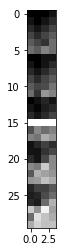

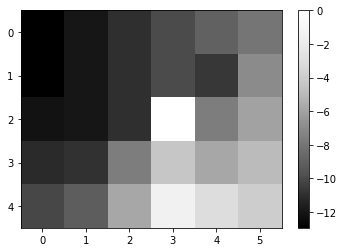

In [81]:
matQ =  np.reshape(vQ , (nstate, naction))
V = np.zeros(nstate)
for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi1[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.colorbar()
plt.show()

In [82]:
print(matQ)

[[-13.9375     -13.9375     -13.9375     -12.9375    ]
 [-12.9375     -13.9375     -12.9375     -11.9375    ]
 [-11.9375     -12.9375     -11.9375     -10.9375    ]
 [-10.9375     -11.9375     -10.9375      -9.9375    ]
 [ -9.9375     -10.9375     -11.625       -8.9375    ]
 [ -8.9375      -9.9375      -7.9375      -8.9375    ]
 [-13.9375     -13.9375     -13.10416667 -12.9375    ]
 [-12.9375     -13.9375     -12.9375     -11.9375    ]
 [-11.9375     -12.9375     -11.9375     -10.9375    ]
 [-10.9375     -11.9375     -10.9375      -9.9375    ]
 [ -9.9375     -10.9375     -10.625       -8.60416667]
 [ -8.9375     -11.625       -6.9375      -7.9375    ]
 [-13.9375     -13.10416667 -12.10416667 -12.9375    ]
 [-12.9375     -13.65972222 -12.56944444 -11.9375    ]
 [-11.9375     -12.9375     -11.9375     -10.9375    ]
 [  0.           0.           0.           0.        ]
 [-10.5         -7.625       -9.          -7.9375    ]
 [ -7.9375      -8.625       -5.9375      -6.9375    ]
 [-13.1041

In [84]:
np.save('Qsol', matQ)
np.load('Qsol.npy')

array([[-13.9375    , -13.9375    , -13.9375    , -12.9375    ],
       [-12.9375    , -13.9375    , -12.9375    , -11.9375    ],
       [-11.9375    , -12.9375    , -11.9375    , -10.9375    ],
       [-10.9375    , -11.9375    , -10.9375    ,  -9.9375    ],
       [ -9.9375    , -10.9375    , -11.625     ,  -8.9375    ],
       [ -8.9375    ,  -9.9375    ,  -7.9375    ,  -8.9375    ],
       [-13.9375    , -13.9375    , -13.10416667, -12.9375    ],
       [-12.9375    , -13.9375    , -12.9375    , -11.9375    ],
       [-11.9375    , -12.9375    , -11.9375    , -10.9375    ],
       [-10.9375    , -11.9375    , -10.9375    ,  -9.9375    ],
       [ -9.9375    , -10.9375    , -10.625     ,  -8.60416667],
       [ -8.9375    , -11.625     ,  -6.9375    ,  -7.9375    ],
       [-13.9375    , -13.10416667, -12.10416667, -12.9375    ],
       [-12.9375    , -13.65972222, -12.56944444, -11.9375    ],
       [-11.9375    , -12.9375    , -11.9375    , -10.9375    ],
       [  0.        ,   0

In [85]:
print(pi1)

[[ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.25  0.25  0.25  0.25]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    1.    0.    0.  ]]


In [86]:
#show me the policy
action = ['up','left','down','right']
for istate in range(nstate):    
    for iaction in range(naction):
        if (pi1[istate,iaction]>0):
            x, y = stateNumToCoord(istate)
            print("(",x,y,")", action[iaction])

( 1 1 ) right
( 2 1 ) right
( 3 1 ) right
( 4 1 ) right
( 5 1 ) right
( 6 1 ) down
( 1 2 ) right
( 2 2 ) right
( 3 2 ) right
( 4 2 ) right
( 5 2 ) down
( 6 2 ) down
( 1 3 ) down
( 2 3 ) right
( 3 3 ) right
( 4 3 ) up
( 4 3 ) left
( 4 3 ) down
( 4 3 ) right
( 5 3 ) left
( 6 3 ) down
( 1 4 ) down
( 2 4 ) right
( 3 4 ) right
( 4 4 ) down
( 5 4 ) left
( 6 4 ) down
( 1 5 ) right
( 2 5 ) right
( 3 5 ) right
( 4 5 ) down
( 5 5 ) left
( 6 5 ) left
